In [12]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

## Training Data

In [2]:
DATA_BASE_DIR: str = "./data/data"
data_folders = os.listdir(f"{DATA_BASE_DIR}")
data_folders = [ fn for fn in data_folders if fn.strip()[0]!='.' ]
data_folders

['cloudy', 'water', 'green_area', 'desert']

In [3]:
data: dict = {
    "filepath": list(),
    "filename": list(),
    "target": list(),
    "class": list()
}

for folder_idx in range(len( data_folders)):
    fold: str = data_folders[folder_idx]
    fold_path: str = f"{DATA_BASE_DIR}/{fold}"
    files: list = os.listdir(fold_path)
    files = [ fn for fn in files if fn.strip()[0]!='.' ]
    # 
    # print(len(files))
    data['target'].extend( [folder_idx] * len(files) )
    data['class'].extend( [f"{fold}"] * len(files) )
    data['filename'].extend([ f"{f}" for f in files ] )
    data['filepath'].extend( [ f"{fold_path}/{f}" for f in files ] )

In [4]:
for k, d in data.items():
    print(k, len(d))

filepath 5731
filename 5731
target 5731
class 5731


In [5]:
data = pd.DataFrame(data)
data

,filepath,filename,target,class
0,./data/data/cloudy/train_17406.jpg,train_17406.jpg,0,cloudy
1,./data/data/cloudy/train_23953.jpg,train_23953.jpg,0,cloudy
2,./data/data/cloudy/train_34585.jpg,train_34585.jpg,0,cloudy
3,./data/data/cloudy/train_16042.jpg,train_16042.jpg,0,cloudy
4,./data/data/cloudy/train_18084.jpg,train_18084.jpg,0,cloudy
...,...,...,...,...
5726,./data/data/desert/desert(878).jpg,desert(878).jpg,3,desert
5727,./data/data/desert/desert(481).jpg,desert(481).jpg,3,desert
5728,./data/data/desert/desert(194).jpg,desert(194).jpg,3,desert
5729,./data/data/desert/desert(1076).jpg,desert(1076).jpg,3,desert


In [6]:
data = data.sample(frac=1, random_state=18).reset_index(drop=True)
data
data.to_csv("data.csv", index=False)

## Validation Data

In [7]:
EVAL_BASE_DIR: str = "./data/sacair_data/validation"
val_folders = os.listdir(f"{EVAL_BASE_DIR}")
val_folders = [ fn for fn in val_folders if fn.strip()[0]!='.' ]
val_folders

['cloudy', 'water', 'green_area', 'desert']

In [8]:
eval: dict = {
    "filepath": list(),
    "filename": list(),
    "target": list(),
    "class": list()
}

for folder_idx in range(len( val_folders)):
    fold: str = val_folders[folder_idx]
    fold_path: str = f"{EVAL_BASE_DIR}/{fold}"
    files: list = os.listdir(fold_path)
    # 
    # print(len(files))
    eval['target'].extend( [folder_idx] * len(files) )
    eval['class'].extend( [f"{fold}"] * len(files) )
    eval['filename'].extend([ f"{f}" for f in files ] )
    eval['filepath'].extend( [ f"{fold_path}/{f}" for f in files ] )

In [9]:
for k, d in eval.items():
    print(k, len(d))

filepath 27
filename 27
target 27
class 27


In [10]:
eval = pd.DataFrame(eval)
eval

,filepath,filename,target,class
0,./data/sacair_data/validation/cloudy/train_106...,train_10667.jpg,0,cloudy
1,./data/sacair_data/validation/cloudy/train_175...,train_17569.jpg,0,cloudy
2,./data/sacair_data/validation/water/SeaLake_23...,SeaLake_2314.jpg,1,water
3,./data/sacair_data/validation/water/SeaLake_16...,SeaLake_1692.jpg,1,water
4,./data/sacair_data/validation/water/SeaLake_21...,SeaLake_2176.jpg,1,water
5,./data/sacair_data/validation/water/SeaLake_20...,SeaLake_2003.jpg,1,water
6,./data/sacair_data/validation/water/SeaLake_13...,SeaLake_135.jpg,1,water
7,./data/sacair_data/validation/water/SeaLake_78...,SeaLake_78.jpg,1,water
8,./data/sacair_data/validation/water/SeaLake_72...,SeaLake_729.jpg,1,water
9,./data/sacair_data/validation/water/SeaLake_13...,SeaLake_1313.jpg,1,water


In [11]:
eval = eval.sample(frac=1, random_state=18).reset_index(drop=True)
eval
eval.to_csv("eval.csv", index=False)

# Test

(64, 64)


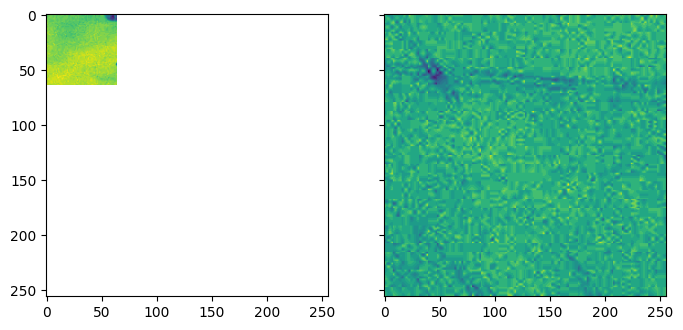

In [35]:
image = cv2.imread("./data/sacair_data/validation/water/SeaLake_1313.jpg", 0)
image1 = cv2.imread("./data/sacair_data/validation/desert/desert(941).jpg", 0)
print(image.shape)

fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True, sharex=True )
ax1.imshow(image)

ax2.imshow(image1)
plt.show()

In [45]:
import skimage
import numpy as np
from skimage.feature import graycomatrix, graycoprops

def haralick(image):
    try:
        # Construct the GLCM with specified parameters (such as distance and angles)
        glcm = graycomatrix(image, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)

        # Calculate Haralick texture properties (contrast, correlation, energy, etc.)
        properties = ['contrast', 'correlation', 'energy', 'homogeneity']
        textures = {prop: graycoprops(glcm, prop)[0, 0] for prop in properties}

        return np.array(list(textures.values()))
    except Exception as e:
        print(f"Haralick features: {e}")


print(haralick(image))
print(haralick(image1))

[2.11811441 0.78782928 0.22168062 0.6498223 ]
[3.55507657 0.14294067 0.22562425 0.50597082]
